# Analisa dataset penjualan video game

# Step 1. Persiapkan Dataset dan Package

In [1]:
# Package
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Dataset
df = pd.read_csv('Video_Game_Sales.csv')
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# melihat isi tiap kolom dari dataset (menentukan perlu cleaning bagian mana)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       7590 non-null   float64
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(10), object(6)
memory usage: 2.0+ MB


In [4]:
# melihat statistik deskriptif dari dataset

df.describe().round()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
count,16450.0,16719.0,16719.0,16719.0,16719.0,16719.0,8137.0,8137.0,7590.0,7590.0
mean,2006.0,0.0,0.0,0.0,0.0,1.0,69.0,26.0,7.0,162.0
std,6.0,1.0,1.0,0.0,0.0,2.0,14.0,19.0,2.0,561.0
min,1980.0,0.0,0.0,0.0,0.0,0.0,13.0,3.0,0.0,4.0
25%,2003.0,0.0,0.0,0.0,0.0,0.0,60.0,12.0,6.0,10.0
50%,2007.0,0.0,0.0,0.0,0.0,0.0,71.0,21.0,8.0,24.0
75%,2010.0,0.0,0.0,0.0,0.0,0.0,79.0,36.0,8.0,81.0
max,2020.0,41.0,29.0,10.0,11.0,83.0,98.0,113.0,10.0,10665.0


# Step 2. Data Cleaning

In [5]:
# ganti index jadi nama game

df = df.set_index('Name')
df.head()

,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
Name,,,,,,,,,,,,,,,
Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E
Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E
Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# kolom2 ini dirasa 'sampah' jadi kita delete

del df['Publisher']
del df['Critic_Count']
del df['Critic_Score']
del df['User_Count']
del df['User_Score']
del df['Developer']
del df['Rating']

df.head()

,Platform,Year_of_Release,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Name,,,,,,,,
Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,82.53
Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,40.24
Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,35.52
Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,32.77
Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,31.37


In [7]:
df.shape

(16719, 8)

In [8]:
# Data diambil dari 2006

df = df[df['Year_of_Release'] >= 2008]

df.shape

(8134, 8)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8134 entries, Mario Kart Wii to Winning Post 8 2016
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Platform         8134 non-null   object 
 1   Year_of_Release  8134 non-null   float64
 2   Genre            8134 non-null   object 
 3   NA_Sales         8134 non-null   float64
 4   EU_Sales         8134 non-null   float64
 5   JP_Sales         8134 non-null   float64
 6   Other_Sales      8134 non-null   float64
 7   Global_Sales     8134 non-null   float64
dtypes: float64(6), object(2)
memory usage: 571.9+ KB


In [10]:
df = df.rename(columns={'Year_of_Release' : 'Year'})

df.head()

,Platform,Year,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Name,,,,,,,,
Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,35.52
Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,32.77
New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,28.32
Kinect Adventures!,X360,2010.0,Misc,15.00,4.89,0.24,1.69,21.81
Wii Fit Plus,Wii,2009.0,Sports,9.01,8.49,2.53,1.77,21.79


# Step 3. Data Analysis and Visualisation

In [11]:
df.corr()

C:\Users\Winstein\AppData\Local\Temp\ipykernel_5992\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Year,1.000000,-0.039795,0.028331,0.028282,-0.011351,-0.005768
NA_Sales,-0.039795,1.000000,0.806017,0.368551,0.794089,0.942965
EU_Sales,0.028331,0.806017,1.000000,0.380008,0.892028,0.930783
JP_Sales,0.028282,0.368551,0.380008,1.000000,0.314544,0.533261
Other_Sales,-0.011351,0.794089,0.892028,0.314544,1.000000,0.887090
Global_Sales,-0.005768,0.942965,0.930783,0.533261,0.887090,1.000000


In [12]:
df_genre = df.groupby('Genre').agg(
    NA_Sales = ('NA_Sales', sum),
    EU_Sales = ('EU_Sales', sum),
    JP_Sales = ('JP_Sales', sum),
    Other_Sales = ('Other_Sales', sum),
    Global_Sales = ('Global_Sales', sum)
)

df_genre

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Genre,,,,,
Action,433.74,310.59,90.17,111.25,946.17
Adventure,43.52,29.87,23.36,9.11,105.98
Fighting,74.61,34.73,23.06,16.11,148.44
Misc,211.61,107.00,37.33,40.49,396.53
Platform,92.33,60.20,23.01,19.84,195.42
Puzzle,28.21,17.02,5.97,4.42,55.67
Racing,94.29,91.62,11.39,29.11,226.42
Role-Playing,155.81,94.46,138.17,33.18,421.47
Shooter,311.26,208.35,15.93,72.65,608.39


In [13]:
df_genre.sort_values(['JP_Sales'],ascending=False)

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Genre,,,,,
Role-Playing,155.81,94.46,138.17,33.18,421.47
Action,433.74,310.59,90.17,111.25,946.17
Misc,211.61,107.00,37.33,40.49,396.53
Sports,276.27,185.19,30.69,68.19,560.60
Adventure,43.52,29.87,23.36,9.11,105.98
Fighting,74.61,34.73,23.06,16.11,148.44
Platform,92.33,60.20,23.01,19.84,195.42
Simulation,70.63,49.80,17.91,12.73,151.19
Shooter,311.26,208.35,15.93,72.65,608.39


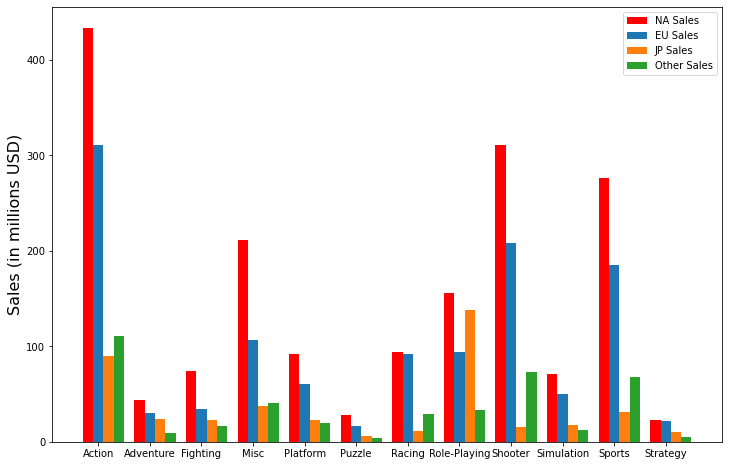

In [14]:
plt.figure(figsize=(12, 8))

bar = {}
bar['NA'] = np.arange(len(df_genre['NA_Sales']))
bar['EU'] = [y + 0.2 for y in bar['NA']]
bar['JP'] = [y + 0.2 for y in bar['EU']]
bar['OT'] = [y + 0.2 for y in bar['JP']]

plt.bar(bar['NA'], (df_genre['NA_Sales']), 0.2, label = 'NA Sales', color='r')
plt.bar(bar['EU'], (df_genre['EU_Sales']), 0.2, label = 'EU Sales')
plt.bar(bar['JP'], (df_genre['JP_Sales']), 0.2, label = 'JP Sales')
plt.bar(bar['OT'], (df_genre['Other_Sales']), 0.2, label = 'Other Sales')

plt.ylabel('Sales (in millions USD)',fontsize = 16)
plt.xticks([x+ 0.2 for x in range(len(bar['NA']))], sorted(df['Genre'].unique().tolist()))

plt.legend()
plt.show()

In [15]:
df_platform = df.groupby('Platform').agg(
    NA_Sales = ('NA_Sales', sum),
    EU_Sales = ('EU_Sales', sum),
    JP_Sales = ('JP_Sales', sum),
    Other_Sales = ('Other_Sales', sum),
    Global_Sales = ('Global_Sales', sum)
)

df_platform

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Platform,,,,,
3DS,82.65,61.27,100.62,13.27,257.92
DC,0.00,0.00,0.04,0.00,0.04
DS,199.00,86.13,76.12,27.64,389.04
PC,41.07,92.17,0.00,18.05,151.79
PS2,32.91,14.24,8.47,30.77,86.38
PS3,349.13,293.73,74.11,120.22,837.06
PS4,108.74,141.09,16.00,48.35,314.23
PSP,34.04,26.21,60.46,15.67,136.29
PSV,12.47,13.07,21.86,6.43,53.85


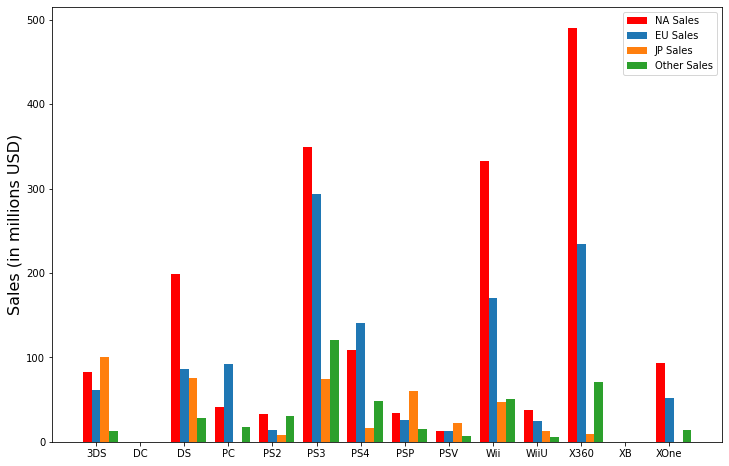

In [16]:
plt.figure(figsize=(12, 8))

bar = {}
bar['NA'] = np.arange(len(df_platform['NA_Sales']))
bar['EU'] = [y + 0.2 for y in bar['NA']]
bar['JP'] = [y + 0.2 for y in bar['EU']]
bar['OT'] = [y + 0.2 for y in bar['JP']]

plt.bar(bar['NA'], (df_platform['NA_Sales']), 0.2, label = 'NA Sales', color='r')
plt.bar(bar['EU'], (df_platform['EU_Sales']), 0.2, label = 'EU Sales')
plt.bar(bar['JP'], (df_platform['JP_Sales']), 0.2, label = 'JP Sales')
plt.bar(bar['OT'], (df_platform['Other_Sales']), 0.2, label = 'Other Sales')

plt.ylabel('Sales (in millions USD)',fontsize = 16)
plt.xticks([x+ 0.2 for x in range(len(bar['NA']))], sorted(df['Platform'].unique().tolist()))

plt.legend()
plt.show()

In [17]:
df_year = df.groupby('Year').agg(
    NA_Sales = ('NA_Sales', sum),
    EU_Sales = ('EU_Sales', sum),
    JP_Sales = ('JP_Sales', sum),
    Other_Sales = ('Other_Sales', sum),
    Global_Sales = ('Global_Sales', sum)
)

df_year

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Year,,,,,
2008.0,348.69,181.14,60.25,81.42,671.79
2009.0,335.55,187.94,61.89,73.44,658.88
2010.0,300.65,171.42,59.49,58.57,590.59
2011.0,238.79,162.97,53.07,52.75,507.79
2012.0,153.26,114.59,51.80,36.19,355.84
2013.0,153.65,121.55,47.69,38.35,361.24
2014.0,132.27,122.74,39.69,36.83,331.51
2015.0,106.86,96.72,34.09,30.31,268.05
2016.0,44.93,51.22,19.31,14.48,130.10


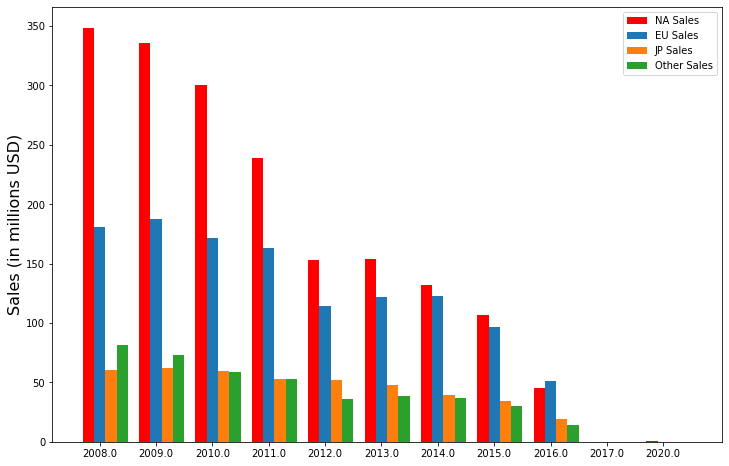

In [18]:
plt.figure(figsize=(12, 8))

bar = {}
bar['NA'] = np.arange(len(df_year['NA_Sales']))
bar['EU'] = [y + 0.2 for y in bar['NA']]
bar['JP'] = [y + 0.2 for y in bar['EU']]
bar['OT'] = [y + 0.2 for y in bar['JP']]

plt.bar(bar['NA'], (df_year['NA_Sales']), 0.2, label = 'NA Sales', color='r')
plt.bar(bar['EU'], (df_year['EU_Sales']), 0.2, label = 'EU Sales')
plt.bar(bar['JP'], (df_year['JP_Sales']), 0.2, label = 'JP Sales')
plt.bar(bar['OT'], (df_year['Other_Sales']), 0.2, label = 'Other Sales')

plt.ylabel('Sales (in millions USD)',fontsize = 16)
plt.xticks([x+ 0.2 for x in range(len(bar['NA']))], sorted(df['Year'].unique().tolist()))

plt.legend()
plt.show()

# Step 4. Conclusion

- Pasar Penjualan Video Game paling laris ada di North America
- Genre yang paling laris adalah genre action diikuti Shooter, dan Sport
- Genre paling tidak laku adalah Puzzle
- Platform favorit para gamer adalah XBOX 360